This notebook gets lyrics using the GeniusLyrics package and does some initial exploration. We're starting with Slayer. 

## Import some stuff

In [13]:
import lyricsgenius as genius
import json
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
#from textblob import TextBlob

## Get all the Slayer lyrics 

...and write them to a file called 'Lyrics Slayer.json'

In [14]:
api_key = 'Nc3VjqRNlEZiD9mqOQATDQ5PuZ4IjdgV13n7c39OIyNwsjuazZThQlQkdr_Hts4c'
api = genius.Genius(api_key)
artist = api.search_artist('slayer')
lyrics = artist.save_lyrics()

Searching for songs by slayer...

Changing artist name to 'Slayer'
Song 1: "Angel of Death"
Song 2: "Raining Blood"
Song 3: "Dead Skin Mask"
Song 4: "South of Heaven"
Song 5: "Evil Has No Boundaries"
Song 6: "Seasons in the Abyss"
Song 7: "Repentless"
Song 8: "Disciple"
Song 9: "Hell Awaits"
Song 10: "War Ensemble"
Song 11: "Jesus Saves"
Song 12: "Postmortem"
Song 13: "World Painted Blood"
Song 14: "Jihad"
Song 15: "Bloodline"
Song 16: "Mandatory Suicide"
Song 17: "Altar of Sacrifice"
Song 18: "Piece by Piece"
Song 19: "Black Magic"
Song 20: "Criminally Insane"
Song 21: "Silent Scream"
Song 22: "Payback"
Song 23: "The Antichrist"
Song 24: "Necrophobic"
Song 25: "213"
Song 26: "Chemical Warfare"
Song 27: "Skeletons of Society"
Song 28: "Cult"
Song 29: "Pride in Prejudice"
Song 30: "Expendable Youth"
Song 31: "Epidemic"
Song 32: "Behind the Crooked Cross"
Song 33: "Reborn"
Song 34: "Threshold"
Song 35: "At Dawn They Sleep"
Song 36: "Die by the Sword"
Song 37: "God Send Death"
Song 38: "W

294 songs! 

Interesting - it seems we have some duplicates here (live and non-live versions mostly, possibly remixes). That might be useful if the lyrics are similar for the live versions with slight variations (more data), but if they are exactly the same I should probably remove them. 

## Create Lyrics DataFrame

In [15]:
with open("Lyrics_Slayer.json") as f:
    data = json.load(f)

df = pd.DataFrame(data["songs"])[["title", "lyrics"]]
df.dropna(inplace=True)
df.head()

,title,lyrics
0,Angel of Death,[Produced by Rick Rubin and Slayer]\n\n[Intro]...
1,Raining Blood,[Produced by Rick Rubin]\n[Instrumental intro]...
2,Dead Skin Mask,[Intro]\nHow I've waited for you to come\nI've...
3,South of Heaven,[Intro]\nAn unforeseen future nestled somewher...
4,Evil Has No Boundaries,[Intro]\nAaaaaaahhhhh\n\n[Lead - Hanneman]\n\n...


In [16]:
df["lyrics"] = (
    df["lyrics"]
    .apply(lambda x: x.lower())
    .apply(lambda x: x.replace("\\", " "))
    .apply(lambda x: x.replace("\\n", " "))
    .apply(lambda x: x.replace("\n", " "))
    .apply(lambda x: x.replace("'", ""))
    .apply(lambda x: x.replace("verse", " "))
    .apply(lambda x: x.replace("chorus", " "))
    .apply(lambda x: x.replace("bridge", " "))
    .apply(lambda x: x.replace("outro", " "))
    .apply(lambda x: x.replace("intro", " "))
    .apply(lambda x: x.replace("pre", " "))
    
)
df.head()

,title,lyrics
0,Angel of Death,[produced by rick rubin and slayer] [ ] aaaaa...
1,Raining Blood,[produced by rick rubin] [instrumental ] [ ]...
2,Dead Skin Mask,[ ] how ive waited for you to come ive been he...
3,South of Heaven,[ ] an unforeseen future nestled somewhere in ...
4,Evil Has No Boundaries,[ ] aaaaaaahhhhh [lead - hanneman] [ 1] bla...


More cleaning needs to be done- remove things in [ ]



## Explore Data

In [17]:
# Define default stopwords list
stoplist = ENGLISH_STOP_WORDS

In [18]:
def show_wordcloud(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stoplist, background_color="white", colormap="Blues").generate(text)

    # Display the generated image:
    fig = plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    #plt.title(f'Word Cloud for Bjork', fontsize=20)
    plt.axis("off")
    plt.show()

In [19]:
def get_wordcloud(df):
    # Get all texts and generate a cloud
    text = " ".join(review for review in df.lyrics)
    show_wordcloud(text) 

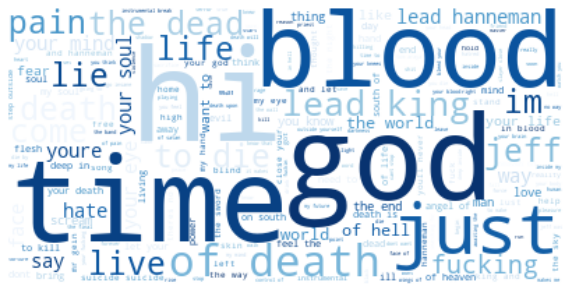

In [20]:
get_wordcloud(df)